In [8]:
# import pandas & numpy 
import pandas as pd
import numpy as np

#import seaborn
import seaborn as sns

# import matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.style as style
# set plotting size parameter
plt.rcParams['figure.figsize'] = (12, 5)

Input the data from the repo in as a dataframe: 

In [9]:
df = pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/candy-power-ranking/candy-data.csv')
df.shape

(85, 13)

Data Summary

In [10]:
candy_shape = df.shape
candy_shape

(85, 13)

This allows you to get a sense of the information stored in your dataset overall.

In [11]:
df

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465
...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,Twizzlers,0,1,0,0,0,0,0,0,0,0.220,0.116,45.466282
81,Warheads,0,1,0,0,0,0,1,0,0,0.093,0.116,39.011898
82,Welch's Fruit Snacks,0,1,0,0,0,0,0,0,1,0.313,0.313,44.375519
83,Werther's Original Caramel,0,0,1,0,0,0,1,0,0,0.186,0.267,41.904308


A full description of these data can be found [here](https://github.com/fivethirtyeight/data/tree/master/candy-power-ranking). From that link, we'll include a description of each variable (column) here:

Header | Description
-------|------------
chocolate | Does it contain chocolate?
fruity | Is it fruit flavored?
caramel | Is there caramel in the candy?
peanutalmondy | Does it contain peanuts, peanut butter or almonds?
nougat | Does it contain nougat?
crispedricewafer | Does it contain crisped rice, wafers, or a cookie component?
hard | Is it a hard candy?
bar | Is it a candy bar?
pluribus | Is it one of many candies in a bag or box?
sugarpercent | The percentile of sugar it falls under within the data set.
pricepercent | The unit price percentile compared to the rest of the set.
winpercent | The overall win percentage according to 269,000 matchups.


Use the `describe` method to calculate and display these summary statistics: 

In [12]:
df = df.value_counts(normalize = False).rename('proportion').reset_index()
df

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent,proportion
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725,1
1,Reese's pieces,1,0,0,1,0,0,0,0,1,0.406,0.651,73.434990,1
2,Skittles wildberry,0,1,0,0,0,0,0,0,1,0.941,0.220,55.103695,1
3,Skittles original,0,1,0,0,0,0,0,0,1,0.941,0.220,63.085140,1
4,Sixlets,1,0,0,0,0,0,0,0,1,0.220,0.081,34.722000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,Laffy Taffy,0,1,0,0,0,0,0,0,0,0.220,0.116,41.389557,1
81,Kit Kat,1,0,0,0,0,1,0,1,0,0.313,0.511,76.768600,1
82,Junior Mints,1,0,0,0,0,0,0,0,1,0.197,0.511,57.219250,1
83,Jawbusters,0,1,0,0,0,0,1,0,1,0.093,0.511,28.127439,1


Generate a histogram of the `winpercent` column with 15 bins.

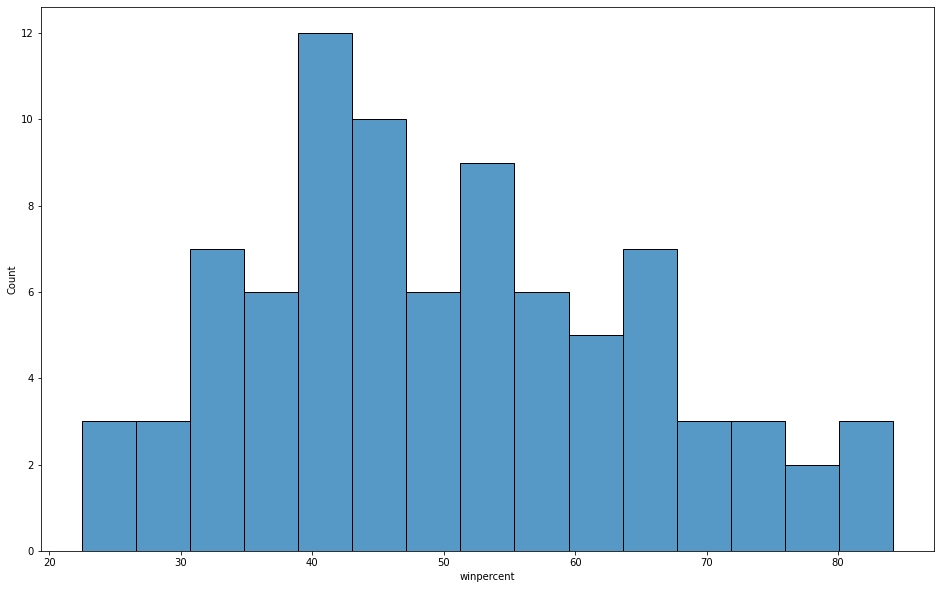

In [13]:
plt.rcParams['figure.figsize'] = (16,10) #default plot size to output
sns.histplot(df['winpercent'], bins=15, kde=False);

f1 = plt.gcf()

Using the `value_counts()` method, I can determine how many different possible values there are for the `chocolate` series in the `df` DataFrame and how many observations fall into each. 

In [14]:
chocolate_values = df['chocolate'].value_counts()
chocolate_values

chocolate
0    48
1    37
Name: count, dtype: int64

There are a number of different ways in which I can determine whether or not data are missing. The most common approaches are summarized here:

```python
# Calculate % of missing values in each column:
df.isna().mean()

# Drop columns with any missing values:
df.dropna(axis='columns')

# Drop columns in which more than 10% of values are missing:
df.dropna(thresh=len(df)*0.9, axis='columns')

# Want to know the *count* of missing values in a DataFrame?
df.isna().sum().sum()

# Just want to know if there are *any* missing values?
df.isna().any().any()
df.isna().any(axis=None)
```

Run the following cell and interpret the ouput:

In [15]:
df.isna().any()

competitorname      False
chocolate           False
fruity              False
caramel             False
peanutyalmondy      False
nougat              False
crispedricewafer    False
hard                False
bar                 False
pluribus            False
sugarpercent        False
pricepercent        False
winpercent          False
proportion          False
dtype: bool

I can determine how many variables have missing data in this dataset: 

In [16]:
var_missing = df.isna().sum().sum()
var_missing 

0

To demonstrate this, if I wanted to replace the zeroes and ones in the current dataset with boolean values, true or false, I could do this using `replace`.

In [17]:
df_bool = df.replace({0:False, 1:True})
df_bool

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent,proportion
0,100 Grand,True,False,True,False,False,True,False,True,False,0.732,0.860,66.971725,True
1,Reese's pieces,True,False,False,True,False,False,False,False,True,0.406,0.651,73.434990,True
2,Skittles wildberry,False,True,False,False,False,False,False,False,True,0.941,0.220,55.103695,True
3,Skittles original,False,True,False,False,False,False,False,False,True,0.941,0.220,63.085140,True
4,Sixlets,True,False,False,False,False,False,False,False,True,0.220,0.081,34.722000,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,Laffy Taffy,False,True,False,False,False,False,False,False,False,0.220,0.116,41.389557,True
81,Kit Kat,True,False,False,False,False,True,False,True,False,0.313,0.511,76.768600,True
82,Junior Mints,True,False,False,False,False,False,False,False,True,0.197,0.511,57.219250,True
83,Jawbusters,False,True,False,False,False,False,True,False,True,0.093,0.511,28.127439,True


I can generate a barplot displaying the number of True and False values for the `chocolate` series.

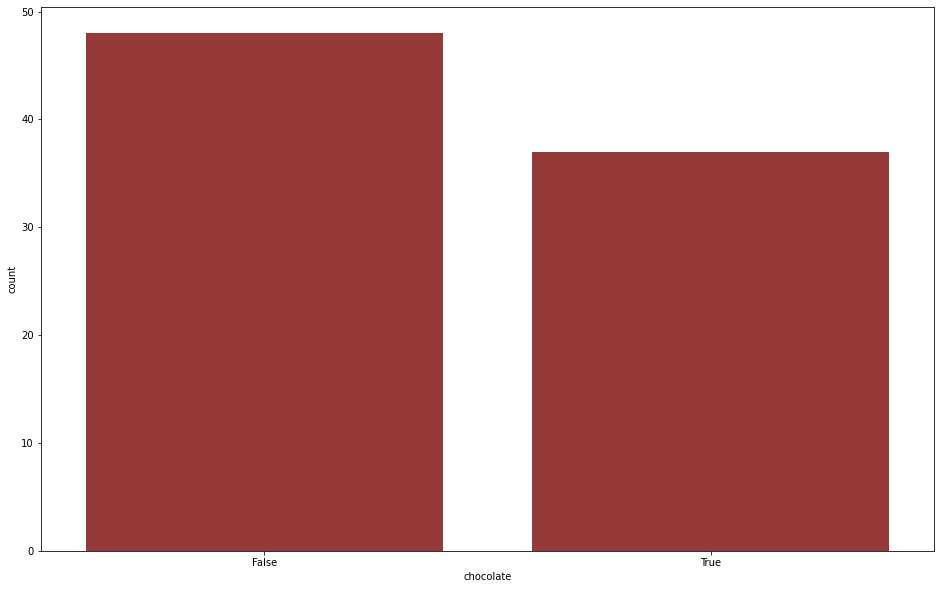

In [18]:
f2 = sns.countplot(x='chocolate', data=df_bool, color = 'brown')
f2 = plt.gcf()

To just get the data I am interested in, I can return a DataFrame with the columns: `competitorname`, `chocolate`, `fruity`, `hard`, `bar`, `pluribus`, `sugarpercent`, `pricepercent`, and `winpercent`.

I stored this output  in `df` (overwriting the previous data stored in `df`).

In [19]:
df = df[['competitorname', 'chocolate', 'fruity', 'hard', 'bar', 'pluribus', 'sugarpercent', 'pricepercent', 'winpercent']]
df.shape

(85, 9)

To remind myself of what type of information is stored in each column, the `dtypes` attribute can be very helpful:

In [20]:
df.dtypes

competitorname     object
chocolate           int64
fruity              int64
hard                int64
bar                 int64
pluribus            int64
sugarpercent      float64
pricepercent      float64
winpercent        float64
dtype: object

In [21]:
df_bool.dtypes

competitorname       object
chocolate              bool
fruity                 bool
caramel                bool
peanutyalmondy         bool
nougat                 bool
crispedricewafer       bool
hard                   bool
bar                    bool
pluribus               bool
sugarpercent        float64
pricepercent        float64
winpercent          float64
proportion             bool
dtype: object

For the `df_bool` dataset, I am interested in selecting only the columns that are either a string (object) or a bool: 

In [22]:
df_bool = df_bool.select_dtypes(include=['bool'or'object'] )
df_bool.shape

(85, 10)

Generally I know that there are three approaches to renaming columns:
1. Most flexible option: `df = df.rename({'A':'a', 'B':'b'}, axis='columns')`
2. Overwrite all column names: `df.columns = ['a', 'b']`
3. Apply string method: `df.columns = df.columns.str.lower()`

Below, I have `renamed` `pluribus` to `multicandy_pack` for both the `df` and `df_bool` dataframes.

In [23]:
df = df.rename({'competitorname': 'competitorname', 'chocolate': 'chocolate' , 'fruity':'fruity', 'hard':'hard', 'bar':'bar', 'pluribus':'multicandy_pack', 'sugarpercent':'sugarpercent', 'pricepercent':'pricepercent', 'winpercent':'winpercent'}, axis='columns')
df_bool = df_bool.rename({'competitorname': 'competitorname', 'chocolate': 'chocolate' , 'fruity':'fruity', 'hard':'hard', 'bar':'bar', 'pluribus':'multicandy_pack', 'sugarpercent':'sugarpercent', 'pricepercent':'pricepercent', 'winpercent':'winpercent'}, axis='columns')
df.columns
df_bool.columns

Index(['chocolate', 'fruity', 'caramel', 'peanutyalmondy', 'nougat',
       'crispedricewafer', 'hard', 'bar', 'multicandy_pack', 'proportion'],
      dtype='object')

Often with data we also need to add new columns; thus to do this, I typically use one of two approaches, summarized generally here: 
1. `assign`
```python
df.assign(new_col = df['col'] * val)
```
2. `apply`
```python
for col in df.columns:
      df[f'{col}_new'] = df[col].apply(my_function)
```

Below I used `assign` to add a new column to `df` called `fruity_choco` that adds the value in `chocolate` to the value in `fruity`. This way, the value will be `0` if it is neither fruity nor chocolate, `1` if it is one or the other, and `2` if it is both.

In [24]:
df = df.assign(fruity_choco = df['chocolate']+ df['fruity'])
df

,competitorname,chocolate,fruity,hard,bar,multicandy_pack,sugarpercent,pricepercent,winpercent,fruity_choco
0,100 Grand,1,0,0,1,0,0.732,0.860,66.971725,1
1,Reese's pieces,1,0,0,0,1,0.406,0.651,73.434990,1
2,Skittles wildberry,0,1,0,0,1,0.941,0.220,55.103695,1
3,Skittles original,0,1,0,0,1,0.941,0.220,63.085140,1
4,Sixlets,1,0,0,0,1,0.220,0.081,34.722000,1
...,...,...,...,...,...,...,...,...,...,...
80,Laffy Taffy,0,1,0,0,0,0.220,0.116,41.389557,1
81,Kit Kat,1,0,0,1,0,0.313,0.511,76.768600,1
82,Junior Mints,1,0,0,0,1,0.197,0.511,57.219250,1
83,Jawbusters,0,1,1,0,1,0.093,0.511,28.127439,1


In [25]:
df['fruity_choco'].value_counts()

fruity_choco
1    73
0    11
2     1
Name: count, dtype: int64

Using `value_counts()` above on the `fruity_choco` column I created, I can see that there is one candy that is both chocolate and fruity in our dataset. 

In [26]:
both = df.loc[df['fruity_choco'] == 2]
both

,competitorname,chocolate,fruity,hard,bar,multicandy_pack,sugarpercent,pricepercent,winpercent,fruity_choco
33,Tootsie Pop,1,1,1,0,0,0.604,0.325,48.982651,2


Using the filter concept, I want to have my dataframe to only include rows that contain candy that is fruity or chocolate in some capacity (meaning, something that is both fruity and chocolate *would* be included). 

In [27]:
df = df[df['fruity_choco'].isin([1,2])]
df

,competitorname,chocolate,fruity,hard,bar,multicandy_pack,sugarpercent,pricepercent,winpercent,fruity_choco
0,100 Grand,1,0,0,1,0,0.732,0.860,66.971725,1
1,Reese's pieces,1,0,0,0,1,0.406,0.651,73.434990,1
2,Skittles wildberry,0,1,0,0,1,0.941,0.220,55.103695,1
3,Skittles original,0,1,0,0,1,0.941,0.220,63.085140,1
4,Sixlets,1,0,0,0,1,0.220,0.081,34.722000,1
...,...,...,...,...,...,...,...,...,...,...
80,Laffy Taffy,0,1,0,0,0,0.220,0.116,41.389557,1
81,Kit Kat,1,0,0,1,0,0.313,0.511,76.768600,1
82,Junior Mints,1,0,0,0,1,0.197,0.511,57.219250,1
83,Jawbusters,0,1,1,0,1,0.093,0.511,28.127439,1


I know that calculations can be carried out on columns using conditionals. Thus, I can determine how many of the candies in my current dataset are part of a pack of candy with multiple types of candy in the pack. To do this, I would use `sum()` on the subset of the data that meets that condition

In [28]:
(df['multicandy_pack']==1).sum()

38

At the moment, my dataframe is currently sorted in alphabetical order by competitor name (candy). Below, I sorted the dataframe to be ascending by surgar percentile.

In [29]:
df = df.sort_values(by='sugarpercent', ascending = False).reset_index()
df

,index,competitorname,chocolate,fruity,hard,bar,multicandy_pack,sugarpercent,pricepercent,winpercent,fruity_choco
0,9,Reese's stuffed with pieces,1,0,0,0,0,0.988,0.651,72.887901,1
1,72,Milky Way Simply Caramel,1,0,0,1,0,0.965,0.860,64.353340,1
2,2,Skittles wildberry,0,1,0,0,1,0.941,0.220,55.103695,1
3,3,Skittles original,0,1,0,0,1,0.941,0.220,63.085140,1
4,49,Gobstopper,0,1,1,0,1,0.906,0.453,46.783348,1
...,...,...,...,...,...,...,...,...,...,...,...
69,40,Sour Patch Tricksters,0,1,0,0,1,0.069,0.116,52.825947,1
70,23,Sour Patch Kids,0,1,0,0,1,0.069,0.116,59.863998,1
71,79,Lemonhead,0,1,1,0,0,0.046,0.104,39.141056,1
72,53,Chiclets,0,1,0,0,1,0.046,0.325,24.524988,1


I can `groupby` a candy's `chocolate` status and then determine the average value for the other variables in the dataset.

In [30]:
df.drop(columns='competitorname').groupby('chocolate').agg('mean')

,index,fruity,hard,bar,multicandy_pack,sugarpercent,pricepercent,winpercent,fruity_choco
chocolate,,,,,,,,,
0,40.837838,1.000000,0.324324,0.000000,0.702703,0.464216,0.332946,43.988311,1.000000
1,45.918919,0.027027,0.027027,0.540541,0.324324,0.512000,0.632162,60.921529,1.027027


Below I carried out a similar operation, group `df` by `fruity`, and then calculated the minimum, average (mean), and maximum values, for the `sugarpercent` column.

In [31]:
sugar_summary = df.groupby('fruity')['sugarpercent'].agg(['min','max','mean'])
sugar_summary

,min,max,mean
fruity,,,
0,0.034,0.988,0.509444
1,0.046,0.941,0.467895
